In [11]:
import numpy as np
import pandas as pd

In [12]:
dataset_dir = "./dataset/"

train_data = np.load(dataset_dir + "train_dataset.npy")
train_label = np.load(dataset_dir + "train_dataset_label.npy")

validation_data = np.load(dataset_dir + "validation_dataset.npy")
validation_label = np.load(dataset_dir + "validation_dataset_label.npy")

6


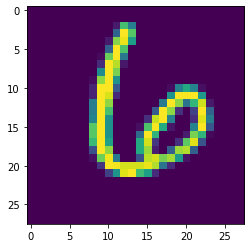

In [13]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0])
print(train_label[0])

In [14]:
import keras
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.callbacks import EarlyStopping
from keras.models import load_model

In [15]:
model = keras.Sequential()
model.add(Conv2D(16, (3,3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(.25))

model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [16]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [17]:
early_stopping = EarlyStopping(
    monitor = 'val_loss', patience = 10
)

In [18]:
model_hist = model.fit(
    train_data, train_label,
    batch_size = 25,
    epochs = 500,
    callbacks = early_stopping,
    validation_data = (validation_data, validation_label)
)

Epoch 1/500
160/160 [==============================] - 3s 12ms/step - loss: 0.7706 - accuracy: 0.7695 - val_loss: 0.3082 - val_accuracy: 0.9000
Epoch 2/500
160/160 [==============================] - 2s 10ms/step - loss: 0.2386 - accuracy: 0.9247 - val_loss: 0.2199 - val_accuracy: 0.9290
Epoch 3/500
160/160 [==============================] - 1s 9ms/step - loss: 0.1668 - accuracy: 0.9475 - val_loss: 0.1619 - val_accuracy: 0.9440
Epoch 4/500
160/160 [==============================] - 2s 11ms/step - loss: 0.1165 - accuracy: 0.9670 - val_loss: 0.1233 - val_accuracy: 0.9630
Epoch 5/500
160/160 [==============================] - 2s 10ms/step - loss: 0.0894 - accuracy: 0.9730 - val_loss: 0.0953 - val_accuracy: 0.9690
Epoch 6/500
160/160 [==============================] - 2s 10ms/step - loss: 0.0738 - accuracy: 0.9750 - val_loss: 0.0931 - val_accuracy: 0.9650
Epoch 7/500
160/160 [==============================] - 2s 12ms/step - loss: 0.0625 - accuracy: 0.9840 - val_loss: 0.0830 - val_accuracy: 

In [19]:
from datetime import datetime

time_now = datetime.now()

In [20]:
model_name = time_now.strftime("model_%Y_%m_%d_%H_%M_%S.h5")
model.save(dataset_dir + model_name)